# Generic Tensorflow Framework for Multi-class Text Classification

## Relation Classification - SEMEVAL 2010 task 8 dataset - 19 Class Problem

## Reading Data

In [1]:
import re
import sys
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append("..")
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 800)
plt.rcParams["figure.figsize"] = (40,10)
pd.set_option('display.max_colwidth', -1)

## Processing Data in Input format

In [2]:
fp = open("../datasets/semeval_relatioship_classification/TRAIN_FILE.TXT","r")
lines = fp.readlines()
sent_ids = []
sentences = []
labels = []
for i,line in enumerate(lines):
    if i%4==0:
        sent = line.split("\t")[-1].strip()[1:-1]
        sent_id = line.split("\t")[0].strip()
        sent = sent.replace("<e1>", "#").replace("</e1>", "#")
        sent = sent.replace("<e2>", "$").replace("</e2>", "$")
        sentences.append(sent)
        sent_ids.append(sent_id)
        label = lines[i+1].strip()
        print(sent_id,sent,label)
        labels.append(label)

1 The system as described above has its greatest application in an arrayed #configuration# of antenna $elements$. Component-Whole(e2,e1)
2 The #child# was carefully wrapped and bound into the $cradle$ by means of a cord. Other
3 The #author# of a keygen uses a $disassembler$ to look at the raw assembly code. Instrument-Agency(e2,e1)
4 A misty #ridge# uprises from the $surge$. Other
5 The #student# $association$ is the voice of the undergraduate student population of the State University of New York at Buffalo. Member-Collection(e1,e2)
6 This is the sprawling #complex# that is Peru's largest $producer$ of silver. Other
7 The current view is that the chronic #inflammation# in the distal part of the stomach caused by Helicobacter pylori $infection$ results in an increased acid production from the non-infected upper corpus region of the stomach. Cause-Effect(e2,e1)
8 #People# have been moving back into $downtown$. Entity-Destination(e1,e2)
9 The #lawsonite# was contained in a $platinum cru

742 We share a #kinship# of $ideals$ with every man and woman on earth who struggles for their God-given rights. Other
743 The #novel# depicts the harsh $life$ of workers who worked on a crab-fishing and canning boat in the northern seas of Japan. Message-Topic(e1,e2)
744 Frank C. Lewis, a representative of a #syndicate# of Chicago $capitalists$, was credited as the source of this information. Member-Collection(e2,e1)
745 The #helicopter# was landing into the high $grass$ during the combat SAR demo with soldiers on board. Entity-Destination(e1,e2)
746 Also (on a proportional basis) the #rainbow# caused by the $spray$ appeared smaller than that of the other rainbow. Cause-Effect(e2,e1)
747 The day after they had marvelled at a #fluther# of $jellyfish$, the girl looked up and frowned in confusion. Member-Collection(e2,e1)
748 The #implant# is placed into the $jaw bone$. Entity-Destination(e1,e2)
749 The first two #papers# define the contemporary terrorist $threat$ while the next three pa

1328 This study presents a comprehensive methodology for calculating the cost to #society# of various criminal $acts$. Other
1329 The launcher released a #satellite# into geosynchronous transfer $orbit$ at 23.31 GMT. Entity-Destination(e1,e2)
1330 In Western Australia, the #helve# of the $hatchet$ is pointed and the natives, after making the notch, stick the tool in the bark and lift themselves up with it. Component-Whole(e1,e2)
1331 A #wisp# of $snipes$ utter their well known cry and scud over the heath; one of these is secured. Member-Collection(e2,e1)
1332 The fad started when a certain #brand# of socks manufactured by an American $company$ became popular among Japanese schoolgirls. Other
1333 In a taped #interview# she recounted two $occasions$ on which she had lent money. Message-Topic(e1,e2)
1334 An unnamed #lifeguard# was pushed into the $pool$. Entity-Destination(e1,e2)
1335 When we were in junior high school, my #friend# made a $map$ of the school lunch tables according to pop

1995 This is wishful #thinking# by a $scribe$ who is more blind to the reality than those he accuses of blindness. Other
1996 I am just joining the queue of disappointed parents and upset children as i bought a #marshmallow# $maker$ and toffee apple maker. Product-Producer(e1,e2)
1997 Chris Caisley remains the #head# of the $team$ and sources were keen to pinpoint his previous experience as chairman of the Bradford Bulls rugby league club. Member-Collection(e1,e2)
1998 Public education systems have carried #nations# into $prosperity$. Other
1999 The #nitric oxide# was contained in a large $gold-plated cylinder$ in which it was ionized by krypton resonance radiation. Content-Container(e1,e2)
2000 Making and fitting #horseshoes# was only part of the life of a $blacksmith$. Other
2001 It's hell in the hospitals where the amputees's #screaming# after the $lapse$ of morphine is heard all the time. Cause-Effect(e2,e1)
2002 Williams, who is regarded as "the first among equals" within the #com

2664 National Geographic videos include several tapes dealing with a #shrewdness# of $apes$ that dwells in Zaire. Member-Collection(e2,e1)
2665 A #man# attaches a $rope$ to a 20 kg block, pulling it across a floor with constant velocity. Instrument-Agency(e2,e1)
2666 Most business that think they have teams really have a #horde# of $heroes$ looking for plunder. Member-Collection(e2,e1)
2667 It is an eye which never blanched at danger, and it is the #boast# of his $soldiers$ that he never looked unpityingly upon the sufferings of his followers. Other
2668 Sure the #almond# $flour$ was pricey, but I felt exotic using an ingredient I've never used before. Entity-Origin(e2,e1)
2669 The Abductor pollicis brevis draws the thumb forward in a plane at right angles to that of the #palm# of the $hand$. Component-Whole(e1,e2)
2670 Text #messages# outline her blossoming $romance$ with the teenager. Message-Topic(e1,e2)
2671 Scabies #mites# construct their $burrows$ in the skin of the infested anim

3266 We store the #cards# in a matching $box$. Content-Container(e1,e2)
3267 The female constructs a #nest# of $grass$ in a hollow on the ground. Other
3268 The #problem# comes from the $widgets$ resembling HTC's own Sense UI widgets. Cause-Effect(e2,e1)
3269 NASA have also taken #fish# into $space$. Entity-Destination(e1,e2)
3270 The average #soldier# joins your $army$ for the pay, and if you cannot pay him he will walk away and go back to get a job as a farmer or laborer. Member-Collection(e1,e2)
3271 The #kids# get to hop around in a $sack$ or pillowcase. Other
3272 More important #advantages# are related to the $position$ of a left-handed first baseman with respect to the base. Other
3273 The #boat# had set sail on Wednesday from the $port$ of Kotorr (Monte Negro) and was making to southern coast of Italy. Entity-Origin(e1,e2)
3274 The #mage# blasts the foe with $spells$ and the Knights ride up the flank and hammer the enemies' sides. Instrument-Agency(e2,e1)
3275 So far this year,

3827 My concern is that the skin around my eyes extending to my #cheek# $bone$ and on the lids are wrinkled - profoundly so. Component-Whole(e2,e1)
3828 The #perpetrators# carried out the Karachi blast through a planted $bomb$. Instrument-Agency(e2,e1)
3829 Other #stations# (and cable channels) have spawned imitation $shows$. Other
3830 Another mathematical system #description# is presented in the next $section$. Message-Topic(e2,e1)
3831 Causing many night-glowing rubies to be strung on red silken thread, he put the #necklaces# in the $cradle$. Entity-Destination(e1,e2)
3832 I'm the coin-operated machine supplier a.k.a. the #coin# $operator$. Other
3833 The #base# of the shrine encloses a lone datura $seedpod$. Content-Container(e2,e1)
3834 The #ship# is arriving into the $port$ now. Entity-Destination(e1,e2)
3835 Cervical #cancer# is caused by $infection$ with the human papillomavirus (HPV) and is one of the most common cancers in women in developing countries. Cause-Effect(e2,e1)
38

4446 The #driver# was ejected from his small $car$. Entity-Origin(e1,e2)
4447 A #nation# is a group of $people$. Member-Collection(e2,e1)
4448 The #paleogene horizons# have migrated into the upthrown $basement blocks$ from adjacent sedimentary horizons. Entity-Destination(e1,e2)
4449 The previous robotics #lecturer# had created an obstacle course with colored duct $tape$ on the floor. Instrument-Agency(e2,e1)
4450 The Aerosmith #game# was in a $bin$ over on the other side of the store. Content-Container(e1,e2)
4451 Obama #speech# addresses $homophobia$, anti-semitism among black Americans. Message-Topic(e1,e2)
4452 The stereo cutter #head# has two $coils$ which move in a magnetic field. Component-Whole(e2,e1)
4453 The loan #program# is running into insurmountable $difficulties$. Other
4454 People look at me as if I'm crazy talking to a #bottle# full of $wine$. Content-Container(e2,e1)
4455 What we saw was a promising #idea# sabotaged by a muddled and undernourished $script$. Other
4456

5082 Similar #provisions# are established in the same $article$. Message-Topic(e2,e1)
5083 Northern Michigan towns hosts an #array# of Yuletide $events$. Other
5084 I judged the #book# by the $cover$. Component-Whole(e2,e1)
5085 At the same time, the #government# carefully chose the $facts$ that it gave to the newspapers. Instrument-Agency(e2,e1)
5086 The slow #suffocation# of the cells swiftly cause unconsciousness and $shock$, soon followed by death. Cause-Effect(e1,e2)
5087 The #granules# and the pebbles are caused by a $magnetic force$ to collide with one another, thereby resulting in liberation of the oxygen molecules contained in the granules and the pebbles. Other
5088 The #results# of Al Shabab KSA in the 2007-2008 season are shown in this $article$. Message-Topic(e2,e1)
5089 The #metacorpora# ware misplaced into the $isthmus$. Entity-Destination(e1,e2)
5090 The #document# makes reference to three similar $incidents$. Message-Topic(e1,e2)
5091 The #governor# piled up all the mu

5710 The seniors poured #flour# into wax $paper$ and threw the items as projectiles on freshmen during a morning pep rally. Entity-Destination(e1,e2)
5711 The #ladder# is designed for the specific needs of the $electrician$. Instrument-Agency(e1,e2)
5712 Options that are core components of the #plan# include: a benefit period, an elimination period, a maximum benefit percentage of salary and a maximum $weekly benefit$. Component-Whole(e2,e1)
5713 His #poetry# and fiction have been published in literary $magazines$ around the world. Component-Whole(e1,e2)
5714 The #resort# comprises a central $hotel$ and free-standing villas in the forest. Component-Whole(e2,e1)
5715 The four #men# are being dragged into the criminal $underworld$. Other
5716 Next we stopped by a pine table where an arrangement of cobalt blue "knitted" #bowls# by a South African $ceramicist$ complemented a neat stack of chic indigo denim trousers by London's Made in Heaven. Product-Producer(e1,e2)
5717 While the curved s

6491 Germans complained bitterly in the Rostrum newspapers, and these #complaints# were reflected in propaganda $films$ regarding soldiers from the French colonial. Message-Topic(e2,e1)
6492 The #products# manufactured by this $firm$ still continue to be chiefly dyestuffs. Product-Producer(e1,e2)
6493 The remainder was reconstructed by Deryck Cooke in 1964 from extensive #sketches# left by the $composer$. Product-Producer(e1,e2)
6494 Specifying a command once, #consumers# execute it by using input $parameters$. Instrument-Agency(e2,e1)
6495 The new #letter# reminds them of the broker's $prediction$ about ABC's stock and makes a new prediction about DEF's stock for the next month. Message-Topic(e1,e2)
6496 They are all in on it and the same #people# who caused the $destruction$ of the economy are still running the show so they can keep us down and buy up the country cheap. Cause-Effect(e1,e2)
6497 The nuclear qualified electronics #technicians# were sent to $nuclear aircraft carriers$. 

7004 #Physical geography# examines the $natural environment$ and how the climate, vegetation & life, soil, water, and landforms are produced and interact. Other
7005 This #code# constructs a triangle from a set of three $lines$. Instrument-Agency(e2,e1)
7006 The target is semantically a #tree# that is constructed from $elements$ of terminal and non-terminal nodes represented through lists and symbols. Component-Whole(e2,e1)
7007 My #home# is a part of homeowner's $association$. Member-Collection(e1,e2)
7008 Recently the #man# was put into an Interpol red flag $list$. Other
7009 In the 1940s and 50s the empty canal was used by a chemical and plastics company to dump nearly 20,000 tons (c.18,000 metric tons) of toxic waste; the #waste# was sealed in $metal drums$ in a manner that has since been declared illegal. Content-Container(e1,e2)
7010 Young people from Bridgend made this animated #film# to highlight the $dangers$ of forest fires. Message-Topic(e1,e2)
7011 The #pouch# is a distingu

7660 'The Incredible Shrinking Man' follows Matheson's novel and effectively captures the #terror# of the $protagonist$ as he shrinks to oblivion. Other
7661 In any case, #fish# $oil$ did harm patients. Entity-Origin(e2,e1)
7662 Nausea is the sensation of unease and #discomfort# from the $stomach$, with the sufferers feeling that they may vomit. Other
7663 I'm the #decision# $maker$, and I had to come up with a way forward that precluded disaster. Product-Producer(e1,e2)
7664 This is an #overview# of the $viewer$ from a developer's perspective. Message-Topic(e1,e2)
7665 Recruiting talented computer #scientists# from underrepresented $communities$ is important to current and future workforce needs of the Computation Directorate as well as the Laboratory as a whole. Entity-Origin(e1,e2)
7666 Afterwards, stroll to a bar for a glass of 'medronho' - the national #liquor# made from a fleshy, red $fruit$ grown in Portugal. Entity-Origin(e1,e2)
7667 The #section# focused on the $notion$ of a b

In [3]:
df = pd.DataFrame({"id":sent_ids,"text":sentences, "label":labels})
df.head()

,id,text,label
0,1,The system as described above has its greatest application in an arrayed #configuration# of antenna $elements$.,"Component-Whole(e2,e1)"
1,2,The #child# was carefully wrapped and bound into the $cradle$ by means of a cord.,Other
2,3,The #author# of a keygen uses a $disassembler$ to look at the raw assembly code.,"Instrument-Agency(e2,e1)"
3,4,A misty #ridge# uprises from the $surge$.,Other
4,5,The #student# $association$ is the voice of the undergraduate student population of the State University of New York at Buffalo.,"Member-Collection(e1,e2)"


In [4]:
df.label.unique()

array(['Component-Whole(e2,e1)', 'Other', 'Instrument-Agency(e2,e1)',
       'Member-Collection(e1,e2)', 'Cause-Effect(e2,e1)',
       'Entity-Destination(e1,e2)', 'Content-Container(e1,e2)',
       'Message-Topic(e1,e2)', 'Product-Producer(e2,e1)',
       'Member-Collection(e2,e1)', 'Entity-Origin(e1,e2)',
       'Cause-Effect(e1,e2)', 'Component-Whole(e1,e2)',
       'Message-Topic(e2,e1)', 'Product-Producer(e1,e2)',
       'Entity-Origin(e2,e1)', 'Content-Container(e2,e1)',
       'Instrument-Agency(e1,e2)', 'Entity-Destination(e2,e1)'],
      dtype=object)

In [5]:
data_classes = ['Component-Whole(e2,e1)', 'Other', 'Instrument-Agency(e2,e1)',
       'Member-Collection(e1,e2)', 'Cause-Effect(e2,e1)',
       'Entity-Destination(e1,e2)', 'Content-Container(e1,e2)',
       'Message-Topic(e1,e2)', 'Product-Producer(e2,e1)',
       'Member-Collection(e2,e1)', 'Entity-Origin(e1,e2)',
       'Cause-Effect(e1,e2)', 'Component-Whole(e1,e2)',
       'Message-Topic(e2,e1)', 'Product-Producer(e1,e2)',
       'Entity-Origin(e2,e1)', 'Content-Container(e2,e1)',
       'Instrument-Agency(e1,e2)', 'Entity-Destination(e2,e1)']

df['class'] = df['label']
df['label'] = df['label'].apply(data_classes.index)

In [6]:
df.label.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [7]:
df.nunique()

id       8000
text     8000
label    19  
class    19  
dtype: int64

In [8]:
df.shape

(8000, 4)

In [9]:
df.head()

,id,text,label,class
0,1,The system as described above has its greatest application in an arrayed #configuration# of antenna $elements$.,0,"Component-Whole(e2,e1)"
1,2,The #child# was carefully wrapped and bound into the $cradle$ by means of a cord.,1,Other
2,3,The #author# of a keygen uses a $disassembler$ to look at the raw assembly code.,2,"Instrument-Agency(e2,e1)"
3,4,A misty #ridge# uprises from the $surge$.,1,Other
4,5,The #student# $association$ is the voice of the undergraduate student population of the State University of New York at Buffalo.,3,"Member-Collection(e1,e2)"


In [10]:
df['class'].value_counts()

Other                        1410
Entity-Destination(e1,e2)    844 
Cause-Effect(e2,e1)          659 
Member-Collection(e2,e1)     612 
Entity-Origin(e1,e2)         568 
Message-Topic(e1,e2)         490 
Component-Whole(e2,e1)       471 
Component-Whole(e1,e2)       470 
Instrument-Agency(e2,e1)     407 
Product-Producer(e2,e1)      394 
Content-Container(e1,e2)     374 
Cause-Effect(e1,e2)          344 
Product-Producer(e1,e2)      323 
Content-Container(e2,e1)     166 
Entity-Origin(e2,e1)         148 
Message-Topic(e2,e1)         144 
Instrument-Agency(e1,e2)     97  
Member-Collection(e1,e2)     78  
Entity-Destination(e2,e1)    1   
Name: class, dtype: int64

In [11]:
df.text.map(lambda x: len(x.split())).describe([0.7,0.8,0.9,0.95,0.999])

count    8000.000000
mean     17.199125  
std      7.534907   
min      3.000000   
50%      16.000000  
70%      20.000000  
80%      23.000000  
90%      26.000000  
95%      31.000000  
99.9%    63.001000  
max      85.000000  
Name: text, dtype: float64

In [12]:
fp = open("../datasets/semeval_relatioship_classification/TEST_FILE_FULL.TXT","r")
lines = fp.readlines()
sentences = []
sent_ids = []
labels = []
for i,line in enumerate(lines):
    if i%4==0:
        sent = line.split("\t")[-1].strip()[1:-1]
        sent_id = line.split("\t")[0].strip()
        sent = sent.replace("<e1>", "#").replace("</e1>", "#")
        sent = sent.replace("<e2>", "$").replace("</e2>", "$")
        sentences.append(sent)
        sent_ids.append(sent_id)
        label = lines[i+1].strip()
        print(sent_id,sent,label)
        labels.append(label)

8001 The most common #audits# were about $waste$ and recycling. Message-Topic(e1,e2)
8002 The #company# fabricates plastic $chairs$. Product-Producer(e2,e1)
8003 The school #master# teaches the lesson with a $stick$. Instrument-Agency(e2,e1)
8004 The suspect dumped the dead #body# into a local $reservoir$. Entity-Destination(e1,e2)
8005 Avian #influenza# is an infectious disease of birds caused by type A strains of the influenza $virus$. Cause-Effect(e2,e1)
8006 The #ear# of the African $elephant$ is significantly larger--measuring 183 cm by 114 cm in the bush elephant. Component-Whole(e1,e2)
8007 A child is told a #lie# for several years by their $parents$ before he/she realizes that a Santa Claus does not exist. Product-Producer(e1,e2)
8008 Skype, a free software, allows a #hookup# of multiple computer $users$ to join in an online conference call without incurring any telephone costs. Member-Collection(e2,e1)
8009 The disgusting scene was retaliation against her brother Philip who re

8691 Gatrell illuminates the #debate# over $public execution$ that raged in polite society. Message-Topic(e1,e2)
8692 But even as she fumbled impatiently for the #switch# of the electric $light$, she knew that the voice had not come from the bed on the further side of the room. Component-Whole(e1,e2)
8693 The #tape recorder# was in a $cabinet$ outside the cab of the engine. Content-Container(e1,e2)
8694 TV total started as a #comedy format# mainly showing and commenting on funny and embarrassing $sequences$ from other TV programs. Other
8695 The #pizza# was inside a $trash bag$ and taped shut. Content-Container(e1,e2)
8696 The synthesist is thus carrying out a role which is analogous to that of a #player# in an $orchestra$. Member-Collection(e1,e2)
8697 Construction #worker# carrying a wooden $plank$ on his shoulder. Other
8698 The neuroscientists have implanted #electrodes# into patient's $brain$. Entity-Destination(e1,e2)
8699 #Mail# was delivered from the $city$ once each week. Enti

9301 The #nest# of $hornets$ was long and uncovered externally. Other
9302 In a known motor-pump unit of this type, the slot-barrel motor is connected, to the drive #spindle# of the screw-spindle $pump$ with a pressure side throttle interval interposed. Component-Whole(e1,e2)
9303 Caillie dutifully explored the city for four weeks, then departed in a huge #caravan# of 1400 $camels$. Member-Collection(e2,e1)
9304 It is very realistic and the #crimes# that are investigated on the $show$ are crimes that have actually occured. Message-Topic(e2,e1)
9305 White #chocolate# is made of cocoa $butter$, milk, and sugar. Entity-Origin(e1,e2)
9306 His #niece# moved into this $apartment$ last month. Entity-Destination(e1,e2)
9307 The Chinesischer Turm ("Chinese Tower") is a 25 metre high wooden structure, first constructed in 1789 to 1790, from a #design# by a Mannheimer military $architect$. Product-Producer(e1,e2)
9308 The solid fuel in a conventional grill remains stationary, unless the #cook# ma

9967 The #closure# caused a $backup$ on the freeway for several miles northbound as cars were detoured to the Lost Hills Road exit and over to Agoura Road to head south on Las Virgenes. Cause-Effect(e1,e2)
9968 The #sculpture# of Lawrence J Nowlan has been featured in numerous $publications$. Message-Topic(e2,e1)
9969 CIP has been bestowing #awards# to honour planning $projects$. Entity-Destination(e1,e2)
9970 The #motor# drives the blade using a $belt$ rather than being directly connected like the portable models. Instrument-Agency(e2,e1)
9971 #Sewer# $covers$ are found in roads - sometimes sidewalks - and permit access to the sewer below. Component-Whole(e2,e1)
9972 The symbol appears on the #hilt# of the $katana$. Component-Whole(e1,e2)
9973 The main theme of the #play# is $ambition$ and how it can destroy a courageous, trustworthy, noble man. Message-Topic(e1,e2)
9974 The #devastation# caused by the earthquake-generated $tsunami$ is seen on the south coast of Western Samoa. Cause-E

10515 In about 985 the Seljuk clan split off from the bulk of the Tokuz-Oghuz, a #confederacy# of nine $clans$ long settled between the Aral and Caspian Seas, and set up camp on the right bank of the lower Syr Darya (Jaxartes), in the direction of Jend, near Kzyl Orda in present day south-central Kazakhstan where they were converted to Islam. Member-Collection(e2,e1)
10516 In Berlin, the #communists# threw up a $wall$ of barbed wire and stone to block the exit of freedom-seeking Germans. Product-Producer(e2,e1)
10517 #Danger# is part of the Palestinian journalist's daily $routine$. Other
10518 The Revealer is an online journal of media #criticism# related to the subject of $religion$ in the press. Message-Topic(e1,e2)
10519 We then placed the #tube# in a $beaker$ of iodine water. Entity-Destination(e1,e2)
10520 This elite #formation# comprised of several regiments: Lifeguard $dragoons$, Lifeguard uhlans, Lifeguard hussars, and Lifeguard cossacks. Member-Collection(e2,e1)
10521 Eco-Frie

In [13]:
df_test = pd.DataFrame({"id":sent_ids,"text":sentences,"label":labels})

In [14]:
data_classes = ['Component-Whole(e2,e1)', 'Other', 'Instrument-Agency(e2,e1)',
       'Member-Collection(e1,e2)', 'Cause-Effect(e2,e1)',
       'Entity-Destination(e1,e2)', 'Content-Container(e1,e2)',
       'Message-Topic(e1,e2)', 'Product-Producer(e2,e1)',
       'Member-Collection(e2,e1)', 'Entity-Origin(e1,e2)',
       'Cause-Effect(e1,e2)', 'Component-Whole(e1,e2)',
       'Message-Topic(e2,e1)', 'Product-Producer(e1,e2)',
       'Entity-Origin(e2,e1)', 'Content-Container(e2,e1)',
       'Instrument-Agency(e1,e2)', 'Entity-Destination(e2,e1)']

df_test['class'] = df_test['label']
df_test['label'] = df_test['label'].apply(data_classes.index)
df_test.shape

(2717, 4)

In [15]:
df.to_csv('../datasets/semeval_relatioship_classification/train.csv', index=False)
df_test.to_csv('../datasets/semeval_relatioship_classification/test.csv', index=False)

## Training (Bert | Electra) classifier with FrameWork

In [16]:
# from tfelectra import ElectraClassification

from classitransformers.report import metrics
from classitransformers.configs import Configs
from classitransformers.tfbert import BertClassification

## Set Configurations

* Pre-trained config filepath, vocab filepath and model checkpoint filepath
* labels list
* train, test and eval batch size
* max_seq_len - how long is the each text input sentence !!
* data_dir - data path folder (optional)
* output_dir - output path folder (optional)

In [17]:
# config = Configs(pretrained_model_dir = '../models/Electra_base/', 
#                  num_train_epochs = 4,
#                  train_batch_size = 64, 
#                  eval_batch_size = 8, 
#                  predict_batch_size = 8, 
#                  do_train = True, 
#                  do_eval = False, 
#                  label_list = ["0", "1", "2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18"], 
#                  max_seq_length = 64,
#                  data_dir='../datasets/semeval_relatioship_classification/',
#                  output_dir = '../electra_output_entity_relationship/')

# model = ElectraClassification(config)


config = Configs(pretrained_model_dir = '../models/Bert_base/',
                 model_name = 'bert',
                 num_train_epochs = 4, 
                 train_batch_size = 64, 
                 eval_batch_size = 8, 
                 predict_batch_size = 8, 
                 do_train = True, do_eval = False, 
                 label_list = ["0", "1", "2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18"], 
                 max_seq_length = 64, 
                 data_dir='../datasets/semeval_relatioship_classification/',
                 output_dir = '../bert_output_entity_relationship/')

model = BertClassification(config)

## Train Method

In [18]:
model.train()



INFO:tensorflow:Writing example 0 of 8000
INFO:tensorflow:***** Running training *****
INFO:tensorflow:  Num examples = 8000
INFO:tensorflow:  Batch size = 64
INFO:tensorflow:  Num steps = 500

INFO:tensorflow:Skipping training since max_steps has already saved.
INFO:tensorflow:training_loop marked as finished


## Test Method

In [19]:
prediction = model.test()

INFO:tensorflow:Writing example 0 of 2717
INFO:tensorflow:***** Running prediction*****
INFO:tensorflow:  Num examples = 2717 (2717 actual, 0 padding)
INFO:tensorflow:  Batch size = 8
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.data.experimental.map_and_batch(...)`.
Instructions for updating:
Use `tf.data.Dataset.map(map_func, num_parallel_calls)` followed by `tf.data.Dataset.batch(batch_size, drop_remainder)`. Static tf.data optimizations will take care of using the fused implementation.

Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Running infer on CPU
INFO:tensorflow:*** Features ***
INFO:tensorflow:  name = input_ids, shape = (?, 64)
INFO:tensorflow:  name = input_mask, shape = (?, 64)
INFO:tensorflow:  name = is_real_example, shape = (?,)
INFO:tensorflow:  name = label_ids, shape = (?,)
INFO:tensorflow:  name = segment_ids, shape = (?, 64)



Instructions 

INFO:tensorflow:  name = bert/encoder/layer_2/attention/self/value/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_2/attention/self/value/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_2/attention/output/dense/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_2/attention/output/dense/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_2/attention/output/LayerNorm/beta:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_2/attention/output/LayerNorm/gamma:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_2/intermediate/dense/kernel:0, shape = (768, 3072), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_2/intermediate/dense/bias:0, shape = (3072,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_2/output/dense/kernel:0, shape = (3072, 768), *INIT_FROM_CK

INFO:tensorflow:  name = bert/encoder/layer_6/output/LayerNorm/gamma:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_7/attention/self/query/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_7/attention/self/query/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_7/attention/self/key/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_7/attention/self/key/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_7/attention/self/value/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_7/attention/self/value/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_7/attention/output/dense/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_7/attention/output/dense/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:te

INFO:tensorflow:  name = bert/encoder/layer_11/intermediate/dense/kernel:0, shape = (768, 3072), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_11/intermediate/dense/bias:0, shape = (3072,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_11/output/dense/kernel:0, shape = (3072, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_11/output/dense/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_11/output/LayerNorm/beta:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_11/output/LayerNorm/gamma:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/pooler/dense/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/pooler/dense/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = output_weights:0, shape = (19, 768)
INFO:tensorflow:  name = output_bias:0, shape = (19,)
INFO:tensorflow:Done calling model_fn.
Instructions for updating:
Use

## Export the checkpoint model to pb (protobuf) format

**In TensorFlow, the protbuf file contains the graph definition as well as the weights of the model. Thus, a pb file + weights is all you need to be able to run a given trained model.**

In [20]:
# Currently does not have support for Electra

model.export_model()

INFO:tensorflow:Using config: {'_model_dir': '../bert_output_entity_relationship/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7efcb73a1be0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
I

'./exported_bert_model/1594471377'

## Inferencing from Trained Model

* This tensorflow format is used for deployment purpose.

In [21]:
# Currently does not have support for Electra

predictions = model.inference(test_filename = '../datasets/semeval_relatioship_classification/test.csv', batch_size = 256)


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from ./exported_bert_model/1594471377/variables/variables
Processing batch no.  0
Processing batch no.  1
Processing batch no.  2
Processing batch no.  3
Processing batch no.  4
Processing batch no.  5
Processing batch no.  6
Processing batch no.  7
Processing batch no.  8
Processing batch no.  9
Processing batch no.  10


**Testing a sentence, takes a list of sentences.**

In [22]:
model.text_inference(['The #ear# of the African $elephant$ is significantly larger--measuring 183 cm by 114 cm in the bush elephant.'])

INFO:tensorflow:Restoring parameters from ./exported_bert_model/1594471377/variables/variables


array([[0.6943412 , 0.3849333 , 0.2879861 , 0.55373204, 0.4147619 ,
        0.27219915, 0.59061164, 0.17670864, 0.16734955, 0.30772895,
        0.58365417, 0.30820334, 0.99939996, 0.38751847, 0.4934964 ,
        0.18550345, 0.38308653, 0.659159  , 0.27254164]], dtype=float32)

In [23]:
y_pred = [np.argmax(tup) for tup in predictions]
y = df_test.label

## Accuracy and Report



Accuracy: 0.852
Precision: 0.804
Recall: 0.824
F1-Score: 0.813


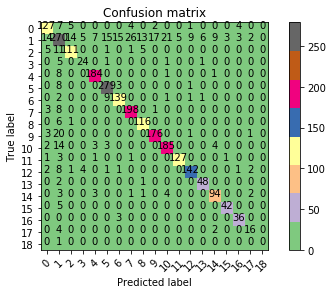

In [24]:
metrics(y, y_pred)